In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)

## Faceting

### Use _mpg.csv_ to complete the following exercises:

In [2]:
data = pd.read_csv("data/mpg.csv")

In [13]:
mean_displ = data.groupby("class").mean()['displ'].reset_index()

In [18]:
def get_disp(x):
    return mean_displ[mean_displ['class'] == x]['displ'].values[0]

In [25]:
data = data.assign(mean_displ=data['class'].apply(get_disp))

#### Facet by class, show hwy vs. displacement (consider sorting facets by mean displacement)

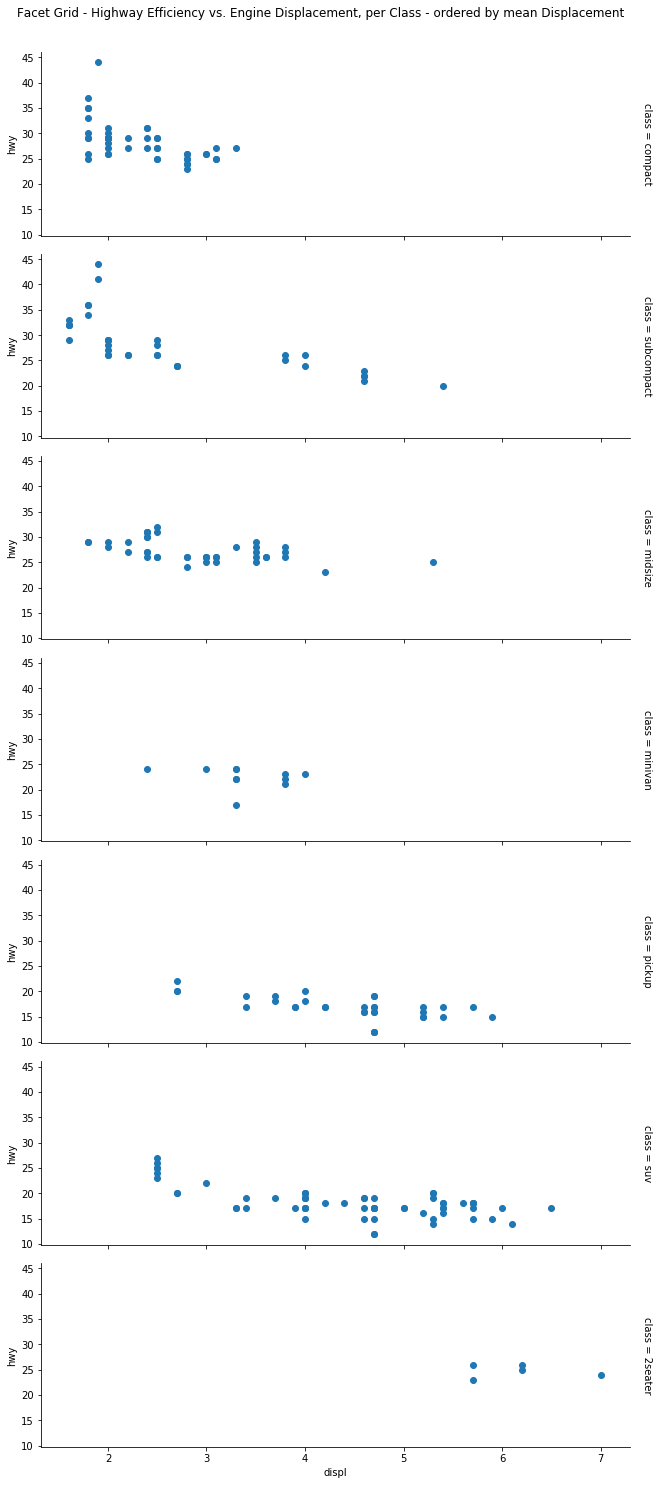

In [71]:
g = sns.FacetGrid(data, row="class", aspect=3, margin_titles=True,
                  row_order=mean_displ.sort_values('displ', ascending=True)['class'])
g = g.map(plt.scatter, 'displ', 'hwy')
plt.subplots_adjust(top=0.95)
_ = g.fig.suptitle("Facet Grid - Highway Efficiency vs. Engine Displacement, per Class - ordered by mean Displacement")

---

#### Building on the above, distinguish transmission type (auto/manual) somehow and draw regression per transmission type

In [78]:
trans_data = data.assign(trans_type = data['trans'].apply(lambda x: x.split("(")[0]))

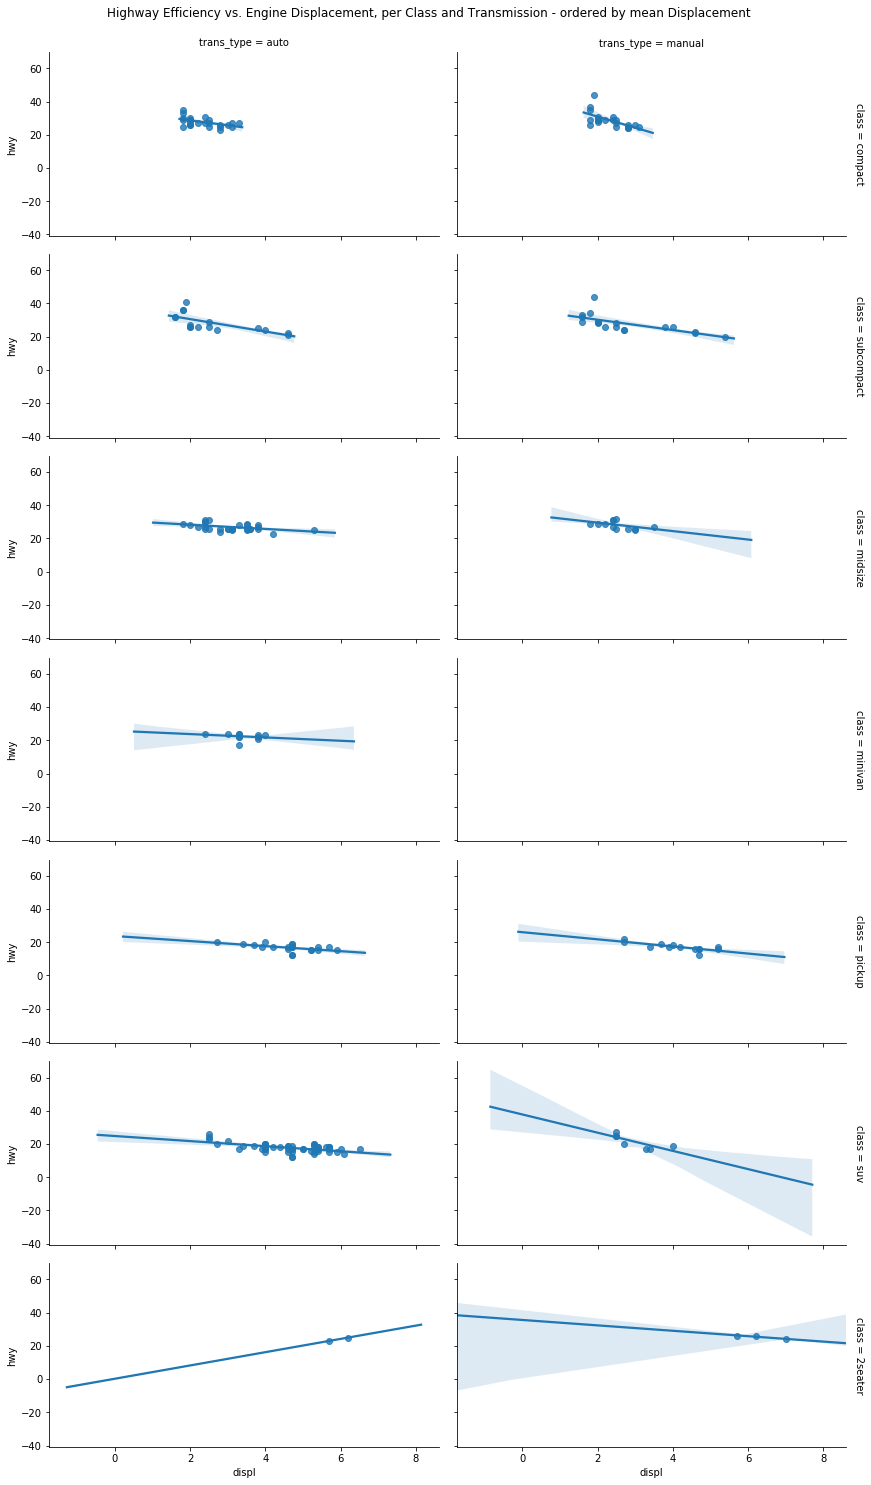

In [83]:
g = sns.FacetGrid(trans_data, row='class', col='trans_type', margin_titles=True, aspect=2,
                  row_order=mean_displ.sort_values('displ', ascending=True)['class'])
g = g.map(sns.regplot, 'displ', 'hwy')
plt.subplots_adjust(top=0.95)
_ = g.fig.suptitle("Highway Efficiency vs. Engine Displacement, per Class and Transmission - ordered by mean Displacement")

---